In [1]:
import h5py
import numpy 
import pylab as mplot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))

<KeysViewHDF5 ['dec', 'mcal_T', 'mcal_T_1m', 'mcal_T_1p', 'mcal_T_2m', 'mcal_T_2p', 'mcal_flags', 'mcal_flags_1m', 'mcal_flags_1p', 'mcal_flags_2m', 'mcal_flags_2p', 'mcal_g1', 'mcal_g1_1m', 'mcal_g1_1p', 'mcal_g1_2m', 'mcal_g1_2p', 'mcal_g2', 'mcal_g2_1m', 'mcal_g2_1p', 'mcal_g2_2m', 'mcal_g2_2p', 'mcal_mag_err_i', 'mcal_mag_err_i_1m', 'mcal_mag_err_i_1p', 'mcal_mag_err_i_2m', 'mcal_mag_err_i_2p', 'mcal_mag_err_r', 'mcal_mag_err_r_1m', 'mcal_mag_err_r_1p', 'mcal_mag_err_r_2m', 'mcal_mag_err_r_2p', 'mcal_mag_err_z', 'mcal_mag_err_z_1m', 'mcal_mag_err_z_1p', 'mcal_mag_err_z_2m', 'mcal_mag_err_z_2p', 'mcal_mag_i', 'mcal_mag_i_1m', 'mcal_mag_i_1p', 'mcal_mag_i_2m', 'mcal_mag_i_2p', 'mcal_mag_r', 'mcal_mag_r_1m', 'mcal_mag_r_1p', 'mcal_mag_r_2m', 'mcal_mag_r_2p', 'mcal_mag_z', 'mcal_mag_z_1m', 'mcal_mag_z_1p', 'mcal_mag_z_2m', 'mcal_mag_z_2p', 'mcal_psf_T_mean', 'mcal_psf_g1', 'mcal_psf_g2', 'mcal_s2n', 'mcal_s2n_1m', 'mcal_s2n_1p', 'mcal_s2n_2m', 'mcal_s2n_2p', 'mean_z', 'mean_z_1m', 'mea

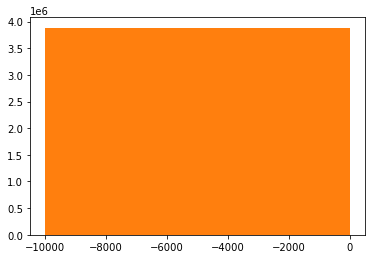

In [6]:
# this is how we open an h5 file
with h5py.File('/global/cfs/cdirs/lsst/groups/WL/projects/txpipe-sys-tests/des-y1/shear_catalog_desy1_masked.h5','r') as f:

    # you can check what is in the file like this
    print(f['shear'].keys())
    
    data1 = f['shear/mcal_psf_g1']
    data2 = f['shear/mcal_psf_g2']
    
    n1, bins1, patcyhes1 = plt.hist(data1, histedges_equalN(data1, 25))
    n2,bins2, patches2 = plt.hist(data2, histedges_equalN(data2,25))
    
    #print(f['stars'].keys())
    #print(np.array(f['stars/id']))
    

In [7]:
print(bins2)

[-9.99900000e+03 -4.34112429e-02 -1.24268130e-02 -7.74367204e-03
 -4.80843994e-03 -2.57210280e-03 -7.04819760e-04  9.34966225e-04
  2.42290994e-03  3.80795510e-03  5.12316681e-03  6.39132067e-03
  7.63128932e-03  8.85728427e-03  1.00838104e-02  1.13231415e-02
  1.25894458e-02  1.39076804e-02  1.53046723e-02  1.68129998e-02
  1.84840913e-02  2.04067960e-02  2.27359970e-02  2.57940623e-02
  3.06366939e-02  2.44877360e-01]


In [8]:
print(bins1)

[-9.99900000e+03 -4.27792304e-02 -1.53302432e-02 -1.06353870e-02
 -7.61788362e-03 -5.27210983e-03 -3.29764508e-03 -1.55581333e-03
  3.05819218e-05  1.50317745e-03  2.89757672e-03  4.23846825e-03
  5.54336071e-03  6.82814808e-03  8.10865567e-03  9.40026929e-03
  1.07217650e-02  1.20874558e-02  1.35215633e-02  1.50566363e-02
  1.67379597e-02  1.86507712e-02  2.09308168e-02  2.38876604e-02
  2.85273562e-02  3.05456315e-01]
